In [1]:
!pip install pyspark

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from pyspark.sql import SparkSession

# Создание SparkSession
spark = SparkSession.builder \
    .appName("Economic Data Analysis") \
    .config("spark.hadoop.fs.defaultFS", "hdfs://localhost:9000") \
    .config("spark.ui.port", "4050") \
    .getOrCreate()

# Установка количества разделов для shuffle операций
spark.conf.set("spark.sql.shuffle.partitions", "50")

25/05/30 10:08:03 WARN Utils: Your hostname, devopsvm resolves to a loopback address: 127.0.1.1; using 172.20.10.6 instead (on interface enp0s3)
25/05/30 10:08:03 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/30 10:08:05 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
# Чтение данных из HDFS
file_path = "hdfs://localhost:9000/user2/hadoop/economic_data/5/Combined_News_DJIA.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Просмотр первых строк данных
df.show(5)

25/05/30 10:08:35 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+----------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|      Date|Label|                Top1|                Top2|                Top3|                Top4|                Top5|                Top6|                Top7|                Top8|                Top9|               Top10|               Top11|               Top12|               Top13|               Top14|               Top15|               Top16|               Top17|               Top18|               Top19|               Top20|               Top

In [5]:
# Чтение данных из HDFS
file_path = "hdfs://localhost:9000/user2/hadoop/economic_data/5/RedditNews.csv"
df1 = spark.read.csv(file_path, header=True, inferSchema=True)

# Просмотр первых строк данных
df1.show(5)

+----------+--------------------+
|      Date|                News|
+----------+--------------------+
|2016-07-01|A 117-year-old wo...|
|2016-07-01|IMF chief backs A...|
|2016-07-01|The president of ...|
|2016-07-01|British Man Who M...|
|2016-07-01|100+ Nobel laurea...|
+----------+--------------------+
only showing top 5 rows



In [6]:
# Чтение данных из HDFS
file_path = "hdfs://localhost:9000/user2/hadoop/economic_data/5/upload_DJIA_table.csv"
df2 = spark.read.csv(file_path, header=True, inferSchema=True)

# Просмотр первых строк данных
df2.show(5)

+----------+------------+------------+------------+------------+---------+------------+
|      Date|        Open|        High|         Low|       Close|   Volume|   Adj Close|
+----------+------------+------------+------------+------------+---------+------------+
|2016-07-01|17924.240234|18002.380859|17916.910156|17949.369141| 82160000|17949.369141|
|2016-06-30|17712.759766|17930.609375|17711.800781|17929.990234|133030000|17929.990234|
|2016-06-29|17456.019531|17704.509766|17456.019531|17694.679688|106380000|17694.679688|
|2016-06-28|17190.509766|17409.720703|17190.509766|17409.720703|112190000|17409.720703|
|2016-06-27|17355.210938|17355.210938|17063.080078|17140.240234|138740000|17140.240234|
+----------+------------+------------+------------+------------+---------+------------+
only showing top 5 rows



In [7]:
df = df.toPandas()
df.head(5)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"""b""""Georgia 'downs two Russian warplanes' as c...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"""b""""Afghan children raped with 'impunity",' U.N. official says - this is sick,a three year old was raped and they do nothin...,b'150 Russian tanks have entered South Ossetia...,...,b'Announcing:Class Action Lawsuit on Behalf of...,"""b""""So---Russia and Georgia are at war and the...","""b""""China tells Bush to stay out of other coun...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"""b'Condoleezza Rice: """"The US would not act to...",b'This is a busy day: The European Union has ...,"""b""""Georgia will withdraw 1",000 soldiers from Iraq to help fight off Russi...
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"""b""""Jewish Georgian minister: Thanks to Israel...","we're fending off Russia """"""",b'Georgian army flees in disarray as Russians ...,"""b""""Olympic opening ceremony fireworks 'faked'""""""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"""b'""""Do not believe TV",neither Russian nor Georgian. There are much ...,b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"""b""""Russia 'ends Georgia operation'""""""","""b'""""If we had no sexual harassment we would h...","""b""""Al-Qa'eda is losing support in Iraq becaus...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"""b""""I'm Trying to Get a Sense of This Whole Ge...",...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"""b'Gorbachev accuses U.S. of making a """"seriou...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"""b""""When the president ordered to attack Tskhi...",we knew then we were doomed. How come he didn...,b' Israel clears troops who killed Reuters cam...,"""b'Britain\'s policy of being tough on drugs i...",says a former civil servant who once ran the ...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,...,"""b""""In an intriguing cyberalliance",two Estonian computer experts are heading to ...,b'The CNN Effect: Georgia Schools Russia in In...,b'Why Russias response to Georgia was right',b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"""b""""Georgia's DDOS came from US sources""""""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice'
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"""b""""Rushdie Condemns Random House's Refusal to...",b'Poland and US agree to missle defense deal. ...,"b'Wi

In [8]:
df1 = df1.toPandas()
df1.head(5)

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


In [9]:
df2 = df2.toPandas()
df2.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [14]:
!pip install TextBlob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 283.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 2.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 4.3 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 2.3 MB/s eta 0:00:00a 0:00:01
ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re

In [17]:
def clean_text(text):
    if isinstance(text, str) and text is not None:
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        text = text.lower().strip()
    else:
        text = ''  # Заменяем None или некорректные значения на пустую строку
    return text

def get_sentiment(text):
    try:
        return TextBlob(text).sentiment.polarity
    except Exception as e:
        return 0.0  

# Очистка и анализ тональности
df1['Cleaned_News'] = df1['News'].apply(clean_text)
df1['Sentiment'] = df1['Cleaned_News'].apply(get_sentiment)

In [ ]:
# Как можно заметить, текст стал нижним регистром, числа убрались, буквы "b'" и прочее в начале тоже. 
# Sentiment показывает, насколько текст новости позитивный , нейтральный или негативный. 
# -1 (очень негативный) ... 0 (нейтральный) ... +1 (очень позитивный)

In [20]:
df1

,Date,News,Cleaned_News,Sentiment
0,2016-07-01,A 117-year-old woman in Mexico City finally re...,a yearold woman in mexico city finally receive...,-0.066667
1,2016-07-01,IMF chief backs Athens as permanent Olympic host,imf chief backs athens as permanent olympic host,0.000000
2,2016-07-01,"The president of France says if Brexit won, so...",the president of france says if brexit won so ...,0.000000
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...,british man who must give police hours notice...,0.111111
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...,nobel laureates urge greenpeace to stop opposi...,0.000000
...,...,...,...,...
76098,2008-06-08,b'Man goes berzerk in Akihabara and stabs ever...,bman goes berzerk in akihabara and stabs every...,-0.200000
76099,2008-06-08,b'Threat of world AIDS pandemic among heterose...,bthreat of world aids pandemic among heterosex...,0.000000
76100,2008-06-08,b'Angst in Ankara: Turkey Steers into a Danger...,bangst in ankara turkey steers into a dangerou...,-0.600000
76101,2008-06-08,"""b""""UK: Identity cards 'could be used to spy o...",buk identity cards could be used to spy on peo...,0.059091


In [ ]:
# Очистка и анализ тональности для Combined_News_DJIA.csv

In [24]:
news_columns = [col for col in df.columns if 'Top' in col or 'news' in col.lower()]
df['Combined_News'] = df[news_columns].apply(lambda row: ' '.join(row.astype(str)), axis=1)

# Очистка и анализ тональности
df['Cleaned_News'] = df['Combined_News'].apply(clean_text)
df['Sentiment'] = df['Cleaned_News'].apply(get_sentiment)

In [25]:
df

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Combined_News,Cleaned_News,Sentiment
0,2008-08-08,0,"""b""""Georgia 'downs two Russian warplanes' as c...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"""b""""Afghan children raped with 'impunity",' U.N. official says - this is sick,a three year old was raped and they do nothin...,b'150 Russian tanks have entered South Ossetia...,...,b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"""b'Condoleezza Rice: """"The US would not act to...",b'This is a busy day: The European Union has ...,"""b""""Georgia will withdraw 1",000 soldiers from Iraq to help fight off Russi...,"""b""""Georgia 'downs two Russian warplanes' as c...",bgeorgia downs two russian warplanes as countr...,-0.023403
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"""b""""Jewish Georgian minister: Thanks to Israel...","we're fending off Russia """"""",b'Georgian army flees in disarray as Russians ...,"""b""""Olympic opening ceremony fireworks 'faked'""""""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,...,"""b'""""Do not believe TV",neither Russian nor Georgian. There are much ...,b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Why wont America and Nato help us? If they w...,bwhy wont america and nato help us if they won...,0.048573
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"""b""""Russia 'ends Georgia operation'""""""","""b'""""If we had no sexual harassment we would h...","""b""""Al-Qa'eda is losing support in Iraq becaus...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"""b""""I'm Trying to Get a Sense of This Whole Ge...",...,b'Why Russias response to Georgia was right',"""b'Gorbachev accuses U.S. of making a """"seriou...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'Remember that adorable 9-year-old who sang a...,bremember that adorable yearold who sang at th...,-0.052157
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"""b""""When the president ordered to attack Tskhi...",we knew then we were doomed. How come he didn...,b' Israel clears troops who killed Reuters cam...,"""b'Britain\'s policy of being tough on drugs i...",says a former civil servant who once ran the ...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,...,b'Why Russias response to Georgia was right',b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"""b""""Georgia's DDOS came from US sources""""""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b' U.S. refuses Israel weapons to attack Iran:...,b us refuses israel weapons to attack iran rep...,0.014654
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"""b""""Rushdie Condemns Random House's Refusal to...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,"""b'""""Non-media"""" photos of South Ossetia/Georg...",b'Georgian TV repor

In [36]:
news_djia_df = pd.merge(df, df1, on='Date', how='inner')

In [37]:
news_djia_df

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Combined_News,Cleaned_News_x,Sentiment_x,News,Cleaned_News_y,Sentiment_y
0,2008-08-08,0,"""b""""Georgia 'downs two Russian warplanes' as c...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"""b""""Afghan children raped with 'impunity",' U.N. official says - this is sick,a three year old was raped and they do nothin...,b'150 Russian tanks have entered South Ossetia...,...,"""b'Condoleezza Rice: """"The US would not act to...",b'This is a busy day: The European Union has ...,"""b""""Georgia will withdraw 1",000 soldiers from Iraq to help fight off Russi...,"""b""""Georgia 'downs two Russian warplanes' as c...",bgeorgia downs two russian warplanes as countr...,-0.023403,"""b""""Georgia 'downs two Russian warplanes' as c...",bgeorgia downs two russian warplanes as countr...,0.000000
1,2008-08-08,0,"""b""""Georgia 'downs two Russian warplanes' as c...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"""b""""Afghan children raped with 'impunity",' U.N. official says - this is sick,a three year old was raped and they do nothin...,b'150 Russian tanks have entered South Ossetia...,...,"""b'Condoleezza Rice: """"The US would not act to...",b'This is a busy day: The European Union has ...,"""b""""Georgia will withdraw 1",000 soldiers from Iraq to help fight off Russi...,"""b""""Georgia 'downs two Russian warplanes' as c...",bgeorgia downs two russian warplanes as countr...,-0.023403,b'BREAKING: Musharraf to be impeached.',bbreaking musharraf to be impeached,0.000000
2,2008-08-08,0,"""b""""Georgia 'downs two Russian warplanes' as c...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"""b""""Afghan children raped with 'impunity",' U.N. official says - this is sick,a three year old was raped and they do nothin...,b'150 Russian tanks have entered South Ossetia...,...,"""b'Condoleezza Rice: """"The US would not act to...",b'This is a busy day: The European Union has ...,"""b""""Georgia will withdraw 1",000 soldiers from Iraq to help fight off Russi...,"""b""""Georgia 'downs two Russian warplanes' as c...",bgeorgia downs two russian warplanes as countr...,-0.023403,b'Russia Today: Columns of troops roll into So...,brussia today columns of troops roll into sout...,0.000000
3,2008-08-08,0,"""b""""Georgia 'downs two Russian warplanes' as c...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"""b""""Afghan children raped with 'impunity",' U.N. official says - this is sick,a three year old was raped and they do nothin...,b'150 Russian tanks have entered South Ossetia...,...,"""b'Condoleezza Rice: """"The US would not act to...",b'This is a busy day: The European Union has ...,"""b""""Georgia will withdraw 1",000 soldiers from Iraq to help fight off Russi...,"""b""""Georgia 'downs two Russian warplanes' as c...",bgeorgia downs two russian warplanes as countr...,-0.023403,b'Russian tanks are moving towards the capital...,brussian tanks are moving towards the capital ...,0.100000
4,2008-08-08,0,"""b""""Georgia 'downs two Russian warplanes' as c...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"""b""""Afghan children raped with 'impunity",' U.N. official says - this is sick,a three year old was raped and they do nothin...,b'150 Russian tanks have entered South Ossetia...,...,"""b'Condoleezza Rice: """"The US would not act to...",b'This is a busy day: The European Union has ...,"""b""""Georgia will withdraw 1",000 soldiers from Iraq to help fight off Russi...,"""b""""Georgia 'downs two Russian warplanes' as c...",bgeor

In [51]:
df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')
df2 = df2.dropna(subset=['Date']).copy()

In [53]:
news_djia_df['Date'] = pd.to_datetime(news_djia_df['Date'], errors='coerce')

In [54]:
news= pd.merge(df2, news_djia_df, on='Date', how='inner')
news

,Date,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,...,Top22,Top23,Top24,Top25,Combined_News,Cleaned_News_x,Sentiment_x,News,Cleaned_News_y,Sentiment_y
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,"""Ozone layer hole seems to be healing - US &am...",A 117-year-old woman in Mexico City finally re...,a yearold woman in mexico city finally receive...,-0.036532,A 117-year-old woman in Mexico City finally re...,a yearold woman in mexico city finally receive...,-0.066667
1,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,"""Ozone layer hole seems to be healing - US &am...",A 117-year-old woman in Mexico City finally re...,a yearold woman in mexico city finally receive...,-0.036532,IMF chief backs Athens as permanent Olympic host,imf chief backs athens as permanent olympic host,0.000000
2,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,"""Ozone layer hole seems to be healing - US &am...",A 117-year-old woman in Mexico City finally re...,a yearold woman in mexico city finally receive...,-0.036532,"The president of France says if Brexit won, so...",the president of france says if brexit won so ...,0.000000
3,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,"""Ozone layer hole seems to be healing - US &am...",A 117-year-old woman in Mexico City finally re...,a yearold woman in mexico city finally receive...,-0.036532,British Man Who Must Give Police 24 Hours' Not...,british man who must give police hours notice...,0.111111
4,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,"""Ozone layer hole seems to be healing - US &am...",A 117-year-old woman in Mexico City finally re...,a yearold woman in mexico city finally receive...,-0.036532,100+ Nobel laureates urge Greenpeace to stop o...,nobel laureates urge greenpeace to stop opposi...,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49713,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0,"""b""""Georgia 'downs two Russian warplanes' as c...",b'BREAKING: Musharraf to be impeached.',...,"""b'Condoleezza Rice: """"The US would not act to...",b'This is a busy day: The European Union has ...,"""b""""Georgia will withdraw 1",000 soldiers from Iraq to help fight off Russi...,"""b""""Georgia 'downs two Russian warplanes' as c...",bgeorgia downs two russian warplanes as countr...,-0.023403,b'Why the Pentagon Thinks Attacking Iran is a ...,bwhy the pentagon thinks attacking iran is a b...,-0.700000
49714,2008-08-08,11432.089844,11759.959961,11388.040039,11734.32031

In [56]:
corr_combined = news['Sentiment_x'].corr(news['Close'])
corr_reddit = news['Sentiment_y'].corr(news['Close'])

print(f"Корреляция Combined Sentiment vs DJIA Close: {corr_combined:.4f}")
print(f"Корреляция Reddit Sentiment vs DJIA Close: {corr_reddit:.4f}")

Корреляция Combined Sentiment vs DJIA Close: 0.0669
Корреляция Reddit Sentiment vs DJIA Close: 0.0230


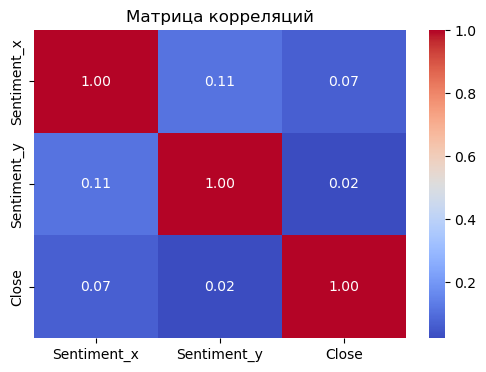

In [57]:
plt.figure(figsize=(6, 4))
sns.heatmap(
    news[['Sentiment_x', 'Sentiment_y', 'Close']].corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title("Матрица корреляций")
plt.show()

In [58]:
!pip install Scikit-learn

R² модели: 0.0005
Коэффициент: 355.34


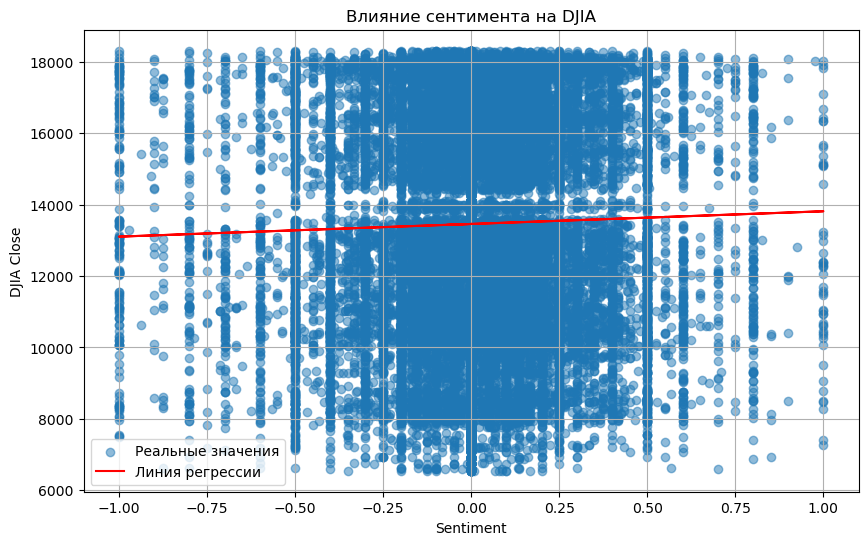

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = news[['Sentiment_y']]
y = news['Close']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f"R² модели: {r2:.4f}")
print(f"Коэффициент: {model.coef_[0]:.2f}")

# График предсказания
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Реальные значения')
plt.plot(X, y_pred, color='red', label='Линия регрессии')
plt.xlabel("Sentiment")
plt.ylabel("DJIA Close")
plt.title("Влияние сентимента на DJIA")
plt.legend()
plt.grid()
plt.show()

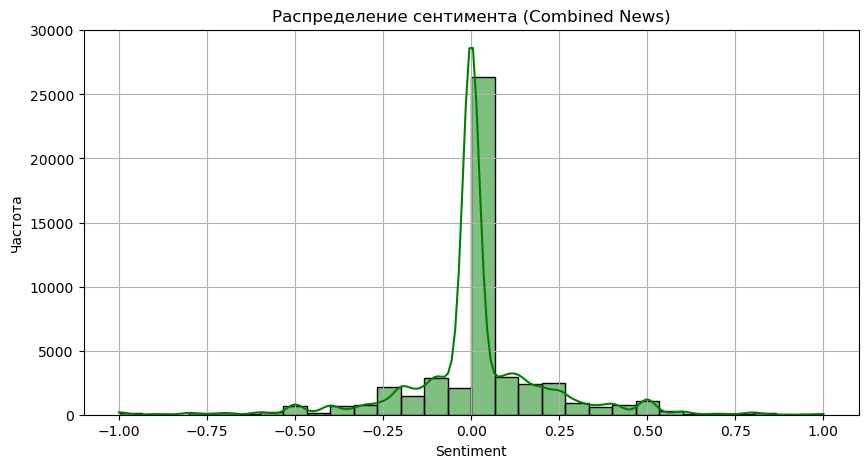

In [60]:
plt.figure(figsize=(10, 5))
sns.histplot(news['Sentiment_y'], bins=30, kde=True, color='green')
plt.title("Распределение сентимента (Combined News)")
plt.xlabel("Sentiment")
plt.ylabel("Частота")
plt.grid(True)
plt.show()

R² модели: 0.0047


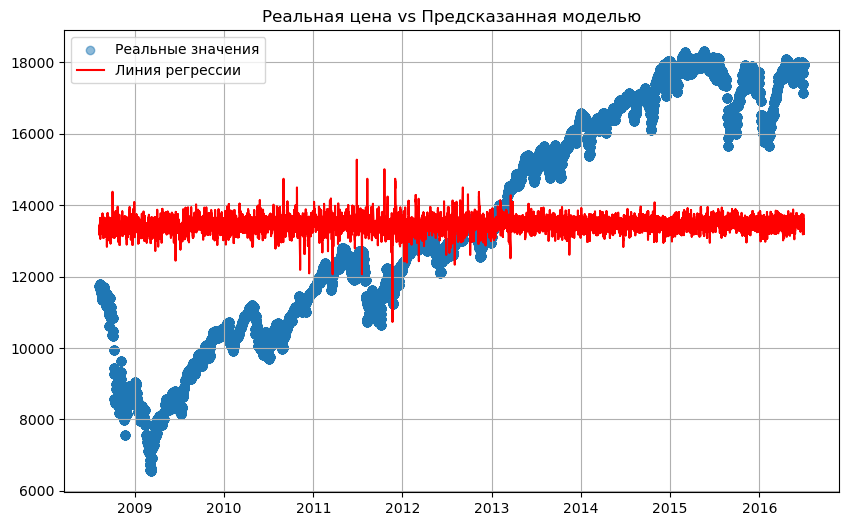

In [61]:
X = news[['Sentiment_y', 'Sentiment_x']]
y = news['Close']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
print(f"R² модели: {r2:.4f}")

# График реальных vs предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(news['Date'], y, label='Реальные значения', alpha=0.5)
plt.plot(news['Date'], y_pred, color='red', label='Линия регрессии')
plt.title("Реальная цена vs Предсказанная моделью")
plt.legend()
plt.grid(True)
plt.show()

In [70]:
news_spark = spark.createDataFrame(news)

# 4. Сохраняем в HDFS
output_path = "hdfs://localhost:9000/user2/hadoop/economic_data/5"

# Форматы: csv, parquet, json и т.д.
news_spark.write.mode("overwrite").parquet(output_path)

print(f"Файл успешно сохранён в HDFS по пути: {output_path}")

25/05/30 11:00:37 WARN TaskSetManager: Stage 12 contains a task of very large size (17282 KiB). The maximum recommended task size is 1000 KiB.


Файл успешно сохранён в HDFS по пути: hdfs://localhost:9000/user2/hadoop/economic_data/5


In [ ]:
# для прав доступа в терминале: hdfs dfs -chmod 777 /user2/hadoop/economic_data